<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## Differential Equations and Euler

### What do we mean by changes?

change in space 
1. elevation
2. in the nutrients in the soil as you walk along a field 
3. nutrients as we dive into the ocean

change in time 
4. change in the concentration of a medicine in our blood as the day progresses
5. changes in the brightness of sunlight as the day progresses
6. changes in the population as time passes 

change in concentration 
7. changes in how fast a chemical reaction occurs as the reagents' concentration is depleted 

### Calculus: Meaning and Notation

N(t) is the number of people at time t where t is time measured in a convenient unit, dN(t)/dt tells us how much N(t) is changing. r is a constant representing the rate of growth. 


### Calculus: Getting a feel for \(\dfrac{dN}{dt}\)

dy/dx is rate of change 

dN/dt = rN(1-N/K), K is the carrying capacity representing the maximum population that the system can hold sustainably. When N > K, the RHS becomes negative, and the population starts to decrease. 

### Solving Differential Equations

solutions can be analytical like y(t) = 3t^3 + 5t or numerical (t,y).


### The Euler Method

### Using Euler for the logistic equation

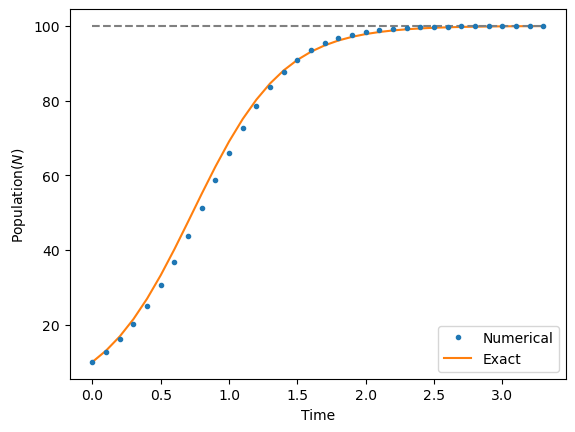

In [2]:
def logistic(time, N0, carrying_capacity, rate):
    '''
    This outputs the exact solution to 
    the logistic differential equation.
    '''
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output


N_stop_difference = 1E-2                # Stop running if the change in population
                                        # between consecutive runs is less than this value
dt = .1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)

    dN = rate*N*(1-N/K)*dt
    N += dN
    time += dt

    # Should we stop the loop?
    try:
        # The lists start empty so the following will raise an
        # error the first two rounds. I am using try to get around it.
        if np.abs(data['N'][-1]-data['N'][-2]) <= N_stop_difference:
            break
    except IndexError:
        # I am being paranoid and checking if there is an error even
        # when the list has more than two elements
        if len(data['N']) < 2:
            pass
        else:
            print('Trouble')
            quit()

exact_data = logistic(time=np.array(data['time']),
                      N0=N0,
                      carrying_capacity=K,
                      rate=rate)

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)  # zorder pushes the plot back
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)


### Some things to note about the code

dictionary dictionary, some times they're useful. 
The True condition used witht he while look makes it such that it will run broken manually. 

To break, the threshold used was 0.01. Check if the difference between the two is as small as needed. 

np.abs() to ensure that the difference is not negative 

use try-except to step around it. 

## Coupled Differential Equations: Predator-Prey Model

### The equations

model from the Lotka-Volterra equations 

dr/dt = αr - βrf 
df/dt = δfr - γf

The Predator-Prey model :O 
 

### Example code

Text(0.5, 1.0, 'Foxes vs Rabbits')

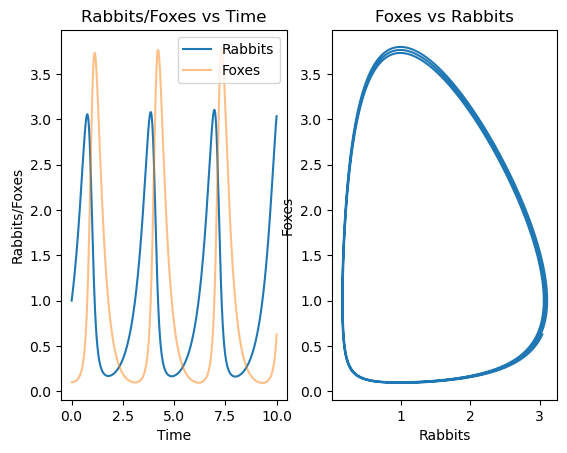

In [3]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []


# Lotka-Volterra equations
def drabbits_dt(rabbits, foxes):
    a, b = 2, 2
    return a*rabbits - b*rabbits*foxes


def dfoxes_dt(rabbits, foxes):
    d, g = 3, 3
    return d*foxes*rabbits - g*foxes


while True:
    data.append([time, rabbits, foxes])

    # Don't update the original variables because we need
    # the OLD values of rabbits to calculate foxes
    rabbits_new = rabbits + drabbits_dt(rabbits, foxes)*dt

    # Using the old value of rabbits
    foxes += dfoxes_dt(rabbits, foxes)*dt

    # No more need for two variables
    rabbits = rabbits_new

    time += dt

    if time > max_time:
        break

# Reorganising the data so I can easily access
# them without having to mess with indices
data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, 1],
    'foxes': data[:, 2],
}

fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')


### Some things to note about the code

1. encapsulating the derivatives as functions 
2. using variables to hold new values of rabbits 
3. collection of data using list and then split them into dictionaries later 

## Hello SciPy

###  SciPy odeint()

In [5]:
from scipy.integrate import odeint

#the code for the plotting is identical to that from the non-SciPy examples.

### Radioactivity

In [6]:
max_time = 0.05
dt = .001
decay_constant = 142       # For 85 Rb (per Myr)
N0 = 1                     # Starting value of N (in billions of atoms)


def dNdt(N, time, decay_constant):
    '''
    Function for the derivative.
    '''
    return - decay_constant*N


all_time = np.arange(0, max_time, dt)

all_N = odeint(y0=[N0],                  # Initial values
               func=dNdt,                # Function for the drivative
               t=all_time,               # Time span
               args=(decay_constant,)    # Any arguments to dNdt
               )


### Logistic Equation

In [8]:
def dNdt(N, time, rate, carrying_capacity):
    '''
    Function for the derivative.
    '''
    return rate*N*(1-N/carrying_capacity)


max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))


### Predator-Prey

In [9]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1

# Lotka-Volterra equations
def dy_dt(y, t):
    '''
    Function for the derivative.
    - y contains all the variables for the simulation 
    - t is the dependant variable
    '''

    rabbits, foxes = y

    # Rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes

    # Foxes
    d, g = 3, 3
    dfoxes_dt = d*foxes*rabbits - g*foxes

    return [drabbits_dt, dfoxes_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)

# Note the order I pass the rabbit and fox information
results = odeint(y0=[rabbits0, foxes0],          # Dependant variable
                 func=dy_dt,                     # Derivatives
                 t=data['time']                  # Independant variable
                 )
# Extract the individual results (Note, the order matters)
data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]

## Exercise 1 :  The Lorentz Attaractor

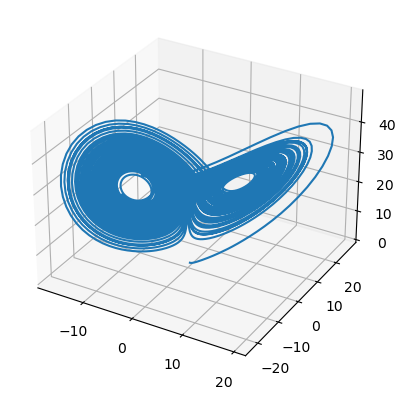

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sigma, beta, rho = 10, 8%3, 28
u0, v0, w0 = 0, 1, 0

tmax, n = 100, 10000

def lorenz(t, X, sigma, beta, rho):
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

soln = solve_ivp(lorenz, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho),
                 dense_output=True)
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z)
plt.show()